# One-Sample Interval Estimations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import f as f_dist

A point estimate, because it is a single number, by itself provides no information about the *precision* and *reliability* of estimation. Consider, for example, using the statistic $\bar{X}$ to calculate a point estimate for the true average $\mu$ of of some distribution. Because of sampling variability, it is virtually never the case that $\bar{x} = \mu$. The point estimate says nothing about how close it might be to $\mu$. An alternative to reporting a single sensible value for the parameter being estimated is to calculate and report an entire interval of plausible values—an *interval estimate* or *confidence interval* (CI). 

<div style="widht:100%; height:20px; background-color:royalblue;"></div>

## Concepts of Interval Estimation & Confidence Interval

While it is true that estimation accuracy increases with large samples, but there is still no reason we should expect a **point estimate** from a given sample to be exactly equal to the population parameter it is supposed to estimate. There are many situations in which it is preferable to determine an interval within which we would expect to find the value of the parameter. Such an interval is called an **interval estimate**.

An interval estimate of a population parameter $\theta$ is an interval of the form $\hat\theta_L < \theta < \hat\theta_U$, where $\hat\theta_L$ and $\hat\theta_U$ depend on the value of the statistic $\hat\Theta$ for a particular sample and also on its the sampling distribution. 

For example, a random sample of SAT verbal scores for students in the entering freshman class might produce an interval from $530$ to $550$, within which we expect to find the true average of all SAT verbal scores for the freshman class. The values of the endpoints, $530$ and $550$, will depend on the computed sample mean $\bar{x}$ and the sampling distribution of $\bar{X}$. As we proceed further in this chapter,  we will see that while computing a point estimate from a given sample helps gain some insights of the population, an interval estimate might be more informative.

---
<h3 style="color: green; font-size: 16pt;">Definition of Confidence Intervals</h3>

Since different samples will generally yield different values of $\hat\Theta$ and, therefore, different values for $\hat\theta_L$ and $\hat\theta_U$, so we can say that these endpoints of the interval are values of corresponding random variables $\hat\Theta_L$ and $\hat\Theta_U$. From the sampling distribution of $\hat\Theta$ we shall be able to determine $\hat\Theta_L$ and $\hat\Theta_U$ such that $P(\hat\Theta_L < \theta < \hat\Theta_U)$ is equal to any positive fractional value we care to specify. If, for instance, we find $\hat\theta_L$ and $\hat\theta_U$ such that

$$
P(\hat\Theta_L < \theta < \hat\Theta_U)  = 1 - \alpha
$$

For $0 < \alpha < 1$, then we have a probability of $1-\alpha$ of selecting a random sample that will produce an interval containing $\theta$. Such an interval is called a *confidence interval*.

> The interval $\hat\theta_L < \theta < \hat\theta_U$, computed from the selected sample such that
> $$ P(\hat\theta_L < \theta < \hat\theta_U)  = 1 - \alpha $$
> is called a **$100(1-\alpha)\%$ confidence interval** (**CI**), the fraction $1-\alpha$ is called the **confidence coefficient** or the **degree of confidence**, and the endpoints, $\hat\theta_L$ and $\hat\theta_U$, are called the lower and upper **confidence limits**.

For example, when $\alpha = 0.05$, we have a $95\%$ confidence interval, for which we can be $95\%$ confidence that the confidence interval will contain the true value of the unknown parameter $\theta$. The lower the value of $\alpha$ yield higher confidence level but wider confidence interval (Intuitively, since wider interval has higher change of containing the targeted value.) Do note that this doesn't mean higher level of confidence is always better, while it increase the precision, the wider range of values can make it less reliable.

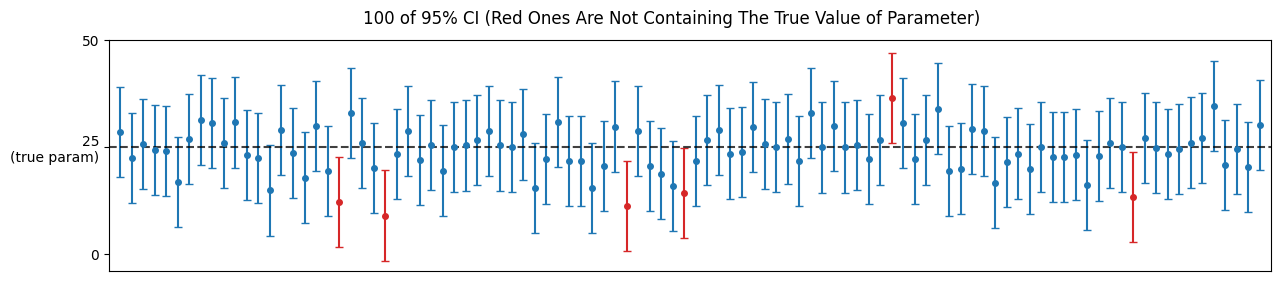

In [2]:
fig, ax = plt.subplots(1,1,figsize=(15,3))

fig.suptitle("100 of 95% CI (Red Ones Are Not Containing The True Value of Parameter)")

n_iter = 100
n = 5
mu = 25
sigma = 12

np.random.seed(778)
xs = np.arange(0,n_iter)
samples = np.array([np.random.normal(size=n, loc=mu, scale=sigma) for _ in xs])
ys = samples.mean(axis=1)
ws = 1.96 * sigma / np.sqrt(n)
contain_mu = (ys - ws < 25) & (ys + ws > 25)

for x, y, c in zip(xs, ys, contain_mu):
    color = "tab:blue" if c else "tab:red"
    ax.errorbar(x, y, ws, fmt="o", capsize=3, markersize=4, color=color)

ax.plot([-1, n_iter], [mu, mu], 'k--', alpha=0.75)
ax.set(
    xticks=[], xlim=[-1, n_iter], 
    yticks=[0,25,50], 
    yticklabels=["0", "25\n(true param)", "50"],
);

<div style="widht:100%; height:20px; background-color:royalblue;"></div>

## Confidence Intervals for a Mean

Consider the sample mean $\bar{X}$ of a sample from a *normally distributed* population. From the reproductive property of the normal distribution, we know that $\bar{X}$ is normally distributed. If we want to find the $100(1-\alpha)\%$ confidence interval for the population mean $\mu$, assuming that *the population variance $\sigma_2$ is known* so that the variance of $\bar{X}$ is $\sigma^2_{\bar{X}} = \sigma^2/n$. Consider

$$
P(-z_{\alpha/2} < Z < z_{\alpha/2}) = 1 - \alpha,
$$

where $z_{\alpha/2}$ is the $z$-value above which we find the area of $\alpha/2$ under the standard normal curve. Since

$$
Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}},
$$

we can write

$$
P\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} < z_{\alpha/2} \right) = 1 - \alpha.
$$

Rearrange the inequality, we obtain

$$
P\left( \bar{X} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \right) = 1 - \alpha
$$

which match to the definition of $100(1-\alpha)\%$ confidence interval for $\theta=\mu$ with $\hat\theta_L =  \bar{X} - z_{\alpha/2}\sigma/\sqrt{n}$ and $\hat\theta_U =  \bar{X} + z_{\alpha/2}\sigma/\sqrt{n}$.

> <div style="color: green;"><b>CI on $\mu$ of Normal Population with $\sigma^2$ Known</b></div>
> If $\bar{X}$ is the mean of a random sample of size $n$ from a normal population with known variance $\sigma^2$, a $100(1-\alpha)%$ confidence interval for $\mu$ is given by the endpoints
> $$ \bar{x} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, $$
> where $z_{α/2}$ is the $z$-critical value leaving an area of $\alpha/2$ to the right.

Do note that one can find the $z$-critical value corresponding to the interested confidence interval using Z-Table or computing the inverse cdf function. Here are the $z$-critical values correspond to the commonly used confidence levels:

| Confidence Level | Z-Critical Value |
|----------|---------|
| $90\%$   | $z_{0.05} = 1.645$ |
| $95\%$   | $z_{0.025} = 1.960$ |
| $99\%$   | $z_{0.005} = 2.576$ |
| $99.5\%$ | $z_{0.0025} = 2.807$ |

<span style="color: green;"><b><u>Example</u></b></span> The average zinc concentration recovered from a sample of measurements taken
in $36$ different locations in a river is found to be $2.6$ grams per milliliter. Find the $95\%$ and $99\%$ confidence intervals for the mean zinc concentration in the river. Assume that the population standard deviation is $0.3$ gram per milliliter and that the zinc concentration is normally distributed.

The point estimate of $\mu$ is $\bar{x} = 2.6$. The $z$-value leaving an area of $0.025$ to the right, and therefore an area of $0.975$ to the left, is $z_{0.025} = 1.96$ (given in the table). Hence, the 95% confidence interval is

$$
2.6 - 1.96 \cdot \frac{0.3}{\sqrt{31}} < \mu < 2.6 + 1.96 \cdot \frac{0.3}{\sqrt{31}}
$$

which reduces to $2.494 < \mu < 2.706$. Similarly, to find the $99\%$ confidence interval, we first find $z_{0.005}=2.576$ and compute:

$$
2.6 - 2.576 \cdot \frac{0.3}{\sqrt{31}} < \mu < 2.6 + 2.576 \cdot \frac{0.3}{\sqrt{31}}
$$

or simply $2.461 < \mu < 2.739$.

---
<h3 style="color: green; font-size: 16pt;">Large-Sample Confidence Intervals</h3>

Provided that the sample size $n$ is sufficiently large enough (typically $n\ge30$), the Central Limit Theorem states that the sample mean $\bar{X}$ will be approximately normal regardless of the population distribution. So we can apply the same procedure used with normal population of finding a confident interval for the population mean using a large-sample.

> <div style="color: green;"><b>CI on $\mu$ of Non-Normal Population with $\sigma^2$ Known</b></div>
> Given that the sample size $n$ is sufficiently large so that
> $$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \approx Z. $$
> The $100(1-\alpha)\%$ confidence interval for $\mu$ is can be approximated by the endpoints
> $$ \bar{x} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, $$
> given that the population variance $\sigma^2$ is known.

Moreover, even with $\sigma^2$ unknown, when $n$ is large enough, we can say that the sample variance $s^2$ is a good estimate for $\sigma^2$. Hence, we can use the CLT to approximate the confidence interval:

> <div style="color: green;"><b>CI on $\mu$ with $\sigma^2$ Unknown and Large-Sample</b></div>
> Given that the sample size $n$ is sufficiently large, The $100(1-\alpha)\%$ confidence interval for $\mu$ is can be approximated by the endpoints
> $$ \bar{x} \pm z_{\alpha/2}\frac{s}{\sqrt{n}}, $$
> where $s$ is the sample standard deviation.

<span style="color: green;"><b><u>Example</u></b></span> Scholastic Aptitude Test (SAT) mathematics scores of a random sample of $500$ high
school seniors in the state of Texas are collected, and the sample mean and standard deviation are found to be $501$ and $112$, respectively. Find a $99\%$ confidence interval on the mean SAT mathematics score for seniors in the state of Texas.

Since the sample size is large, it is reasonable to use the normal approximation. For $99\%$ confidence level, $z_{\alpha/2}=z_{0.005}=2.576$, given $\bar{x}=501$ and $s=112$ we obtain

$$
501 \pm 2.576 \cdot \frac{112}{\sqrt{500}} = 501 \pm 12.9026,
$$

which is $488.0974 < \mu < 513.9026$.

---
<h3 style="color: green; font-size: 16pt;">The Case of Unknown Variance</h3>

Recall from [Chapter 5](Chapter%205%20-%20Fundamental%20Sampling%20Distributions.ipynb) that if we have a random sample from a normal distribution, then the random variable

$$
T = \frac{\bar{X} - \mu}{S/\sqrt{n}}
$$

has a Student $t$-distribution with $v=n-1$ degrees of freedom. Here $S$ is the sample standard deviation. In this situation, with $\sigma$ unknown, $T$ can be used to construct a confidence interval on $\mu$. The procedure is the same as that with $\sigma$ known except that $\sigma$ is replaced by $S$ and the standard normal distribution is replaced by the $t$-distribution. We can do this since both normal and $t$-distribution are symmetric about the mean, so we can assert that

$$
P(-t_{\alpha/2} < T < t_{\alpha/2}) = 1 - \alpha.
$$

Now apply the same procedure used with normal population, omitted the details, yield

$$
P(\bar{X} - t_{\alpha/2}\frac{S}{\sqrt{n}} < \mu < \bar{X} + t_{\alpha/2}\frac{S}{\sqrt{n}}) = 1 - \alpha.
$$

So we can use $t$-distribution to determine confidence intervals when $\sigma$ is unknown and $n$ is not sufficiently large enough to use normal approximation. Do note that the population have to be normal or approximately normal.

> <div style="color: green;"><b>CI on $\mu$ with $\sigma^2$ Unknown and Small-Sample</b></div>
> Let $\bar{x}$ and $s$ be the sample mean and sample standard deviation computed from the results of a random sample of size $n$ from a normal population with mean $\mu$. Then a $100(1-\alpha)\%$ confidence interval for $\mu$ is given by the endpoints
> $$ \bar{x} \pm t_{\alpha/2}\frac{s}{\sqrt{n}}, $$
> where $t_{\alpha/2}$ is the $t$-critical value above which we find the area under $t$-distribution curve with $v=n-1$ degrees of freedom.

<span style="color: green;"><b><u>Example</u></b></span> The contents of seven similar containers of sulfuric acid are $9.8, 10.2, 10.4, 9.8, 10.0, 10.2,$ and $9.6$ liters. Find a $95\%$ confidence interval for the mean contents of all such containers, assuming an approximately normal distribution.

The mean and standard deviation of the sample are

In [3]:
ml = np.array([9.8, 10.2, 10.4, 9.8, 10.0, 10.2, 9.6])
print("sample mean =", ml.mean())
print("sample std  =", ml.std(ddof=1))

sample mean = 10.0
sample std  = 0.28284271247461884


With $v=7-1=6$ degrees of freedom, we obtain $t_{0.025}=-t_{0.975}=2.447$, so the confidence interval is given by the endpoints

$$
10 \pm 2.447 \cdot \frac{0.283}{\sqrt{7}} = 10 \pm 0.262
$$

that is $9.738 < \mu < 10.262$.

<div style="widht:100%; height:20px; background-color:royalblue;"></div>

## Confidence Level, Precision, and Sample Size

Why settle for a confidence level of $95\%$ when a level of $99\%$ or even $99.9\%$ is achievable?
Because their is a kind of trade-off between precision and reliability of a confidence interval. The price paid for the higher confidence level is a wider interval. Since the width of $100(1-\alpha)\%$ interval is given by

$$
w = 2z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
$$

We can see that when the confidence level increases, $\alpha$ decrease, and in turn make $z_{\alpha/2}$ increases, and when $z_{\alpha/2}$ gets larger, the interval width $w$ also grows wider. So one can say that, we have more confidence in the $99\%$ interval precisely because it is wider that $95\%$ interval. The higher the desired degree of confidence, the wider the resulting interval will be.

An appealing strategy to tackle this trade-off is to specify both the desired confidence level and interval width and then determine the necessary sample size. The formula for the sample size can be found by rearranging the formula for the interval width.

> The sample size necessary for the $100(1-\alpha)%$ confidence interval to have a width $w$ is
> $$ n = \left( \frac{2 z_{\alpha/2}\sigma}{w} \right)^2 $$

The half-width $z_{\alpha/2}\cdot\sigma/\sqrt{n}$ of the $100(1-\alpha)\%$ CI is sometimes called the **bound on the error of estimation** associated with a $100(1-\alpha)\%$ confidence level. That is, for example with $95\%$ confidence, the point estimate $\bar{x}$ will be no farther than this half-width from $\mu$. 

> If $\bar{x}$ is used as a point estimate of $\mu$, we can be $100(1-\alpha)\%$ confident that the error (difference between $\bar{x}$ and $\mu$) will not exceed $z_{\alpha/2} \cdot \sigma/\sqrt{n}$.

With this proposition about measurement of error, we can rewrite the formula of the sample size, this time for the desired confidence level and bound on the error instead of interval width.

> If $\bar{x}$ is used as a point estimate of $\mu$, we can be $100(1-\alpha)\%$ confident that the error will not exceed a specified amount $\epsilon$ when the sample size is
> $$ n = \left( \frac{z_{\alpha/2}\sigma}{\epsilon} \right)^2 $$

<span style="color: green;"><b><u>Example</u></b></span> Extensive monitoring of a computer time-sharing system has suggested that response time to a particular editing command is normally distributed with standard deviation $25$ millisec. A new operating system has been installed, and we wish to
estimate the true average response time $\mu$ for the new environment. Assuming that response times are still normally distributed with $\sigma=25$, what sample size is necessary to ensure that the resulting $95\%$ CI has a width of (at most) $10$?

The sample size $n$ can be simply calculated by

$$
n = \left[ \frac{2(1.96)(25)}{10} \right]^2 =  96.04.
$$

Since $n$ must be integer, we round it up to $n=97$ to ensure that the width not exceed $10$, since the interval width increase when the sample size decrease, we shouldn't round the result down to ensure that the interval width will not exceed the desired limit.

<div style="widht:100%; height:20px; background-color:royalblue;"></div>

## One-Sided Confidence Bounds

The confidence intervals and resulting confidence bounds discussed thus far are two-sided (i.e., both upper *and* lower bounds are given). However, there are many applications in which only one bound is sought.

For example, if the measurement of interest is tensile strength (the maximum stress that a material can bear before breaking when it is stretched or pulled), the engineer receives better information from a lower bound only. This bound communicates the *worst-case scenario*. Another example, where the upper bound would be more informative, is the case in which inferences need to be made concerning the mean mercury composition in a river. An upper bound is very informative in this case because a relatively large value of mean mercury composition is certainly not appealing, so an analysis on the upper bound would be profitable.

One-sided confidence bounds are developed in the same fashion as two-sided intervals:

$$
P\left( \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} < z_\alpha \right) = 1-\alpha
\quad\text{and}\quad
P\left( \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} > -z_\alpha \right) = 1-\alpha
$$

From these probability expressions, we can rearrange the inequalities to obtain the upper and lower confidence bounds.

> If $\bar{X}$ is the mean of a random sample of size $n$ from a population with variance $\sigma^2$, the one-sided $100(1-\alpha)\%$ confidence bounds for $\mu$ are given by
> $$\begin{align*} \text{upper bound}&: &\bar{x} + z_\alpha\sigma/\sqrt{n}; \\ \text{lower bound}&: &\bar{x} - z_\alpha\sigma/\sqrt{n}. \end{align*}$$

For other cases, the methods used to evaluate/approximate the confidence bounds are similar to the two-sided bounds:

- If the population is non-normal, we can do normal approximation if the sample is large.
- If $\sigma$ is unknown, we can use $s$ instead if the sample is large, or use $t$-distribution instead of normal distribution (given that the population is normal).

<span style="color: green;"><b><u>Example</u></b></span> In a psychological testing experiment, $25$ subjects are selected randomly and their
reaction time, in seconds, to a particular stimulus is measured. Past experience suggests that the variance in reaction times to these types of stimuli is $4$ sec$^2$ and that the distribution of reaction times is approximately normal. The average time for the subjects is $6.2$ seconds. Give an upper $95\%$ bound for the mean reaction time.

The $95\%$ upper bound is given by

$$
\bar{x} + z_\alpha\frac{\sigma}{\sqrt{n}}
$$

here, $\alpha=0.05$ and so $z_\alpha=1.645$. Therefore, the upper bound is

$$
6.2 + 1.645 \cdot \frac{2}{5} = 6.858 \text{ seconds}.
$$

Hence, we are $95\%$ confident that the mean reaction time is less than $6.858$ seconds.

<div style="widht:100%; height:20px; background-color:royalblue;"></div>

## Prediction Intervals (OPTIONAL)

The point and interval estimations of the mean in previous sections provide good information about the unknown parameter $\mu$ of a distribution. Sometimes, other than the population mean, the objective is to predict **a single value of a variable to be observed at some future time**, rather than to estimate the mean value of that variable. Such an interval is called a *prediction interval*.

To tackle this, we want to find a kind of confidence interval, this time based on a single future observation rather that the population mean. The general setup is as follows: We have available a random sample $X_1, X_2, \ldots, X_n$ from a normal population distribution, and wish to predict the value of $X_{n+1}$, a single future observation. A point predictor for $X_{n+1}$ is $\bar{X}$, and the resulting prediction error is $\bar{X} - X_{n+1}$. The expected value of the prediction error is

$$
E(\bar{X}-X_{n-1}) = E(\bar{X}) - E(X_{n+1}) = \mu - \mu = 0.
$$

and the variance of the prediction error is

$$
\textrm{Var}(\bar{X} - X_{n-1}) = \textrm{Var}(\bar{X}) + \textrm{Var}(X_{n-1}) = \sigma^2/n + \sigma^2 = \sigma^2\left(1 + \frac{1}{n}\right).
$$

Since the population is normal and the prediction error $\bar{X}-X_{n-1}$ is a linear combination of the sample $X_1, X_2, \ldots, X_n, X_{n+1}$. Thus, the prediction error is normally distributed.

$$
Z = \frac{(\bar{X} - X_{n+1}) - 0}{\sqrt{\sigma^2(1+1/n)}} = \frac{\bar{X}-X_{n+1}}{\sigma\sqrt{1+1/n}}.
$$

As a result, if we use the probability statement

$$
P(-z_{\alpha/2} < Z < z_{\alpha/2}) = 1 - \alpha
$$

we have the following event occurring with probability $1 - \alpha$:

$$
\bar{X} - z_{\alpha/2}\sigma\sqrt{1+\frac{1}{n}} < X_{n+1} < \bar{X} + z_{\alpha/2}\sigma\sqrt{1+\frac{1}{n}}.
$$

As a result, computation of the prediction interval is formalized as follows.

> For a normal distribution of measurements with unknown mean $\mu$ and known variance $\sigma^2$, a **$100(1-\alpha)\%$ prediction interval** (**PI**) of a future observation $X_{n+1}$ is
> $$ \bar{x} \pm z_{\alpha/2}\sigma\sqrt{1+\frac{1}{n}}. $$
> In the case that $\sigma^2$ is unknown, we can use $t$-critical value for $v=n-1$ degrees of freedom instead of $z$-critical value and replacing $\sigma$ with $s$:
> $$ \bar{x} \pm t_{\alpha/2}s\sqrt{1+\frac{1}{n}} $$
> or apply a normal approximation if the sample is sufficiently large.

Similar to confidence interval, if we are willing to find **one-sided prediction bounds**, we can replace $\alpha/2$ with $\alpha$ and replace $\pm$ with $+$ for upper bound or with $-$ for lower bound:

$$
\begin{align*} 
\text{upper prediction bound}&: &\bar{x} + z_\alpha\sigma\sqrt{1+\frac{1}{n}}; \\ 
\text{lower prediction bound}&: &\bar{x} - z_\alpha\sigma\sqrt{1+\frac{1}{n}}. 
\end{align*}
$$

and replacing $z$-critical value with $t$-critical value if needed.

<span style="color: green;"><b><u>Example</u></b></span> Consider the following sample of fat content (in percentage) of $n=10$ randomly selected hot dogs:

Assuming that these were selected from a normal population distribution, a $95\%$ CI for (interval estimate of) the population mean fat content is

$$
\begin{align*}
\bar{x} \pm t_{0.025;v=9}\frac{s}{\sqrt{n}} &= 21.09 \pm 2.262 \cdot \frac{4.134}{\sqrt{10}} \\
&= 21.90 \pm 2.96 \iff (18.94, 24.86).
\end{align*}
$$

Suppose, however, you are going to eat a single hot dog of this type and want a prediction for the resulting fat content, a prediction interval would be more informative. A $95\%$ PI in this case is given by

$$
\begin{align*}
\bar{x} \pm t_{0.025;v=9}s\sqrt{1+\frac{1}{n}} &= 21.09 \pm (2.262)(4.134)\sqrt{1+\frac{1}{10}} \\
&= 21.90 \pm 9.81 \iff (12.09, 31.71).
\end{align*}
$$

This interval is quite wide, indicating substantial uncertainty about fat content. Notice that the width of the PI is more than three times that of the CI.

The error of prediction is $\bar{X} - X_{n+1}$, a difference between two random variables, whereas the estimation error is $\bar{X} - \mu$, the difference between a random variable and a fixed (but unknown) value. The PI is wider than the CI because there is more variability
in the prediction error (due to $X_{n+1}$) than in the estimation error. In fact, as $n$ gets arbitrarily large, the CI shrinks to the single value $\mu$, and the PI approaches $\mu \pm z_{\alpha/2}\sigma$. There is uncertainty about a single $X$ value even when there is no need to estimate.

$$
\begin{align*}
\text{limit of CI}&:\quad \lim_{n\to\infty} \left( \bar{x} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \right) = \bar{x} \\
\text{limit of PI}&:\quad \lim_{n\to\infty} \left( \bar{x} \pm z_{\alpha/2}\sigma\sqrt{1+1/n} \right) = \bar{x} \pm z_{\alpha/2}\sigma
\end{align*}
$$

<div style="widht:100%; height:20px; background-color:royalblue;"></div>

## Tolerance Intervals (OPTIONAL)

Suppose that interest centers around the manufacturing of a component part and specifications exist on a dimension of that part. In addition,
there is little concern about the mean of the dimension. But unlike in the scenario in previous section (PI), one may be less interested in a *single observation* and more interested in where the *majority of the population* falls. If process specifications are important, the manager of the process is concerned about *long-range* performance, not the next observation. One must attempt to determine bounds that, in some probabilistic sense, "cover" values in the population (i.e., the measured values of the dimension).

For a normal population, it's quite obvious that a interval which cover $100(1-\alpha)$% of all population is

$$
\mu \pm z_{\alpha/2}\sigma.
$$

However, in practice, $\mu$ and $\sigma$ are seldom known; thus, the user must apply

$$
\bar{x} \pm z_{\alpha/2}s.
$$

Now, of course, the interval is a random variable, and hence the coverage of a proportion of the population by the interval is not exactly $1-\alpha$. As a result, a $100(1-\gamma)\%$ confidence interval must be used since $\bar{x} \pm ks$ cannot be expected to cover any specified proportion all the time. As a result, we have the following definition.

> For a normal distribution of measurements with unknown mean $\mu$ and unknown standard deviation $\sigma$, **tolerance limits** are given by
> $$ \bar{x} \pm ks, $$
> where $k$ is determined such that one can assert with $100(1-\gamma)\%$ confidence that the given limits contain (or cover) at least the proportion $1-\alpha$ (or percentage of $100(1-\alpha)\%$) of the measurements/population.

The value $k$ is called the **tolerance critical value** which depends on confidence level, proportion coverage, and sample size, which can be found in the table ["Factors for Tolerance Intervals"](https://www.bessegato.com.br/UFJF/resources/tolerance_table.pdf) table for confidence levels of $100(1-\gamma)\% = 90\%, 95\%, 99\%$ and percentages coverage of $100(1-\alpha)\% = 90\%, 95\%, 99\%$ for sample size $n$ ranging from $2$ up to $100$.

<span style="color: green;"><b><u>Example</u></b></span> A meat inspector has randomly selected $30$ packs of $95\%$ lean beef. The sample resulted in a mean of $96.2\%$ with a sample standard deviation of $0.8\%$. Find a tolerance interval for capturing at least $90\%$ of packages of $95\%$ lean beef with $95\%$ confidence. Assume normality.

From the tolerance critical value, for $1-\gamma=0.95, 1-\alpha=0.90,$ and $n=30$, we found $k=2.14$. Thus, the tolerance interval is

$$
\bar{x} \pm ks = 96.2 \pm (2.14)(0.8) \iff (94.5, 97.9).
$$

So we are $95\%$ confident that the above range covers the central $90\%$ of the distribution of $95\%$ lean beef packages.

<div style="widht:100%; height:20px; background-color:royalblue;"></div>


## Confidence Intervals for a Proportion

<span style="color: green;"><b><u>Example</u></b></span> In a random sample of $n = 500$ families owning television sets in the city of Hamilton, Canada, it is found that $x = 340$ subscribe to HBO. Find a $95\%$ confidence interval for the actual proportion of families with television sets in this city that subscribe to HBO.

Since the sample proportion is just the sample mean of a sample of Bernoulli population. So the Central Limit Theorem can be apply for $\hat{p}$ with large sample and the confidence interval can be computed the same way done with $\bar{X}$. First consider

$$
\mu_\hat{p} = p \quad\text{and}\quad \sigma^2_\hat{p} = \frac{p(1-p)}{n}
$$

so, assuming that $n=500$ is a sufficiently large sample size for a normal approximation, we obtain

$$
\frac{\hat{p} - p}{\sqrt{p(1-p)/n}} = Z \sim N(0,1).
$$

Thus, the $100(1-\alpha)\%$ confidence interval for $p$ can be derived from

$$
P\left( -z_{\alpha/2} < \frac{\hat{p} - p}{\sqrt{p(1-p)/n}} < z_{\alpha/2} \right) = 1 - \alpha.
$$

Now we can manipulate the inequality to get the bounds on $p$, the process is quite long, so here is the result endpoints:

$$
\frac{\hat{p}+z_{\alpha/2}^2/2n}{1+z_{\alpha/2}^2/n} \pm z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p})/n + z_{\alpha/2}^2/4n^2}}{1 + z_{\alpha/2}^2/n}.
$$

The formula is quite messy, but if the sample size $n$ is very large, then many terms in this formula are negligible, as a result, the endpoints become (approximately)

$$
\hat{p} \pm z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}.
$$

From the given information, $\hat{p}=340/500=0.68$, so we can approximate the endpoints of the $95\%$ confidence interval as

$$
0.68 \pm 1.96 \sqrt{\frac{0.68 \cdot 0.32}{500}}
$$

which simplifies to $0.6391 < p < 0.7209$. If using the big formula, the result will be $0.6378 < p < 0.7194$.

<div style="widht:100%; height:20px; background-color:royalblue;"></div>

## Confidence Intervals for a Variance

Recall that for a sample of size $n$ from a normal population, the statistic

$$
\chi^2 = \frac{(n-1)S^2}{\sigma^2}
$$

has a chi-squared distribution with $v=n-1$ degrees of freedom, and we may write

$$
P(\chi^2_{1-\alpha/2} < \chi^2 < \chi^2_{\alpha/2}) = 1 - \alpha
$$

where $\chi^2_{\alpha/2}$ is the chi-squared critical value leaving an area of $\alpha/2$ to the right. Substitute in the statistic we interested in to obtain

$$
P\left(\chi^2_{1-\alpha/2} < \frac{(n-1)S^2}{\sigma^2} < \chi^2_{\alpha/2}\right) = 1 - \alpha.
$$

Manipulating the inequality and we can obtain the confidence interval for parameter $\sigma^2$ as follows.

> If $s^2$ is the variance of a random sample of size $n$ from a normal population, a $100(1-\alpha)\%$ confidence interval for $\sigma^2$ is
> $$ \frac{(n-1)s^2}{\chi^2_{\alpha/2}} < \sigma^2 < \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}}, $$
> where $\chi^2_{\alpha/2}$ and $\chi^2_{1-\alpha/2}$ are $\chi^2$-critical values with $v = n-1$ degrees of freedom, leaving areas of $\alpha/2$ and $1-\alpha/2$, respectively, to the right.

> An approximate $100(1-\alpha)\%$ confidence interval for $\sigma$ is obtained by taking the square root of each endpoint of the interval for $\sigma^2$.

<span style="color: green;"><b><u>Example</u></b></span> The following are the weights, in decagrams, of 10 packages of grass seed distributed
by a certain company: 

Find a $95\%$ confidence interval for the variance of the weights of all such packages of grass seed distributed by this company, assuming a normal population.

First. we compute the sample variance:

In [4]:
w = np.array([46.4, 46.1, 45.8, 47.0, 46.1, 45.9, 45.8, 46.9, 45.2, 46.0])
print("sample variance (s):", w.var(ddof=1))

sample variance (s): 0.28622222222222177


To obtain $95\%$ confidence interval for $\sigma^2$, we choose $\alpha=0.05$. Then, from chi-squared table, with $v=9$ degrees of freedom, we found $\chi^2_{0.025} = 19.023$ and $\chi^2_{0.975} = 2.700$. Therefore, the $95\%$ confidence interval for $\sigma^2$ is

$$
\frac{(9)(0.286)}{19.023} < \sigma^2 < \frac{(9)(0.286)}{2.700}
$$

or simply $0.135 < \sigma^2 < 0.953$.

<div style="widht:100%; height:20px; background-color:lightsalmon;"></div>

# Two-Samples Estimations

## Estimating the Difference Between Two Means

If we have two populations with means $\mu_1$ and $\mu_2$ and variances $\sigma^2_1$ and $\sigma^2_2$, respectively, a point estimator of the difference $\mu_1 - \mu_2$ is given by the statistic $\bar{X}_1 - \bar{X}_2$. Therefore, to obtain a point estimate of $\mu_1 - \mu_2$, we shall select **two independent random samples**, one from each population, of sizes $n_1$ and $n_2$, and compute $\bar{x}_1 - \bar{x}_2$, the difference of the sample means. Clearly, we must consider the sampling distribution of $\bar{X}_1 - \bar{X}_2$.

From [Chapter 5](Chapter%205%20-%20Fundamental%20Sampling%20Distributions.ipynb), it is known that the mean and the variance of $\bar{X}_1 - \bar{X}_2$ is given by

$$
\mu_{\bar{X}_1 - \bar{X}_2} = \mu_1 - \mu_2 \quad\text{and}\quad \sigma^2_{\bar{X}_1 - \bar{X}_2} = \frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2} 
$$

respectively, and that

$$
Z = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_2}}
$$

is approximately normal for large samples (or exactly normal if the populations are normal). Therefore, we can assert

$$
P(-z_{\alpha/2} < Z < z_{\alpha/2}) = 1 - \alpha
$$

Substituting $Z$  leads to the formula for a confidence interval for $\mu_1 - \mu_2$. 

> <div style="color: green;"><b>CI on $\mu_1 - \mu_2$ of Independent Samples with $\sigma^2_1$ and $\sigma^2_2$ Known</b></div>
> 
> If $\bar{x}_1$ and $\bar{x}_2$ are means of **independent random samples** of sizes $n_1$ and $n_2$ from populations with known variances 
> $\sigma^2_1$ and $\sigma^2_2$, respectively, a $100(1-\alpha)\%$ confidence interval for $\mu_1 - \mu_2$ is given by
> $$ (\bar{x}_1 - \bar{x}_2) \pm z_{\alpha/2}\sqrt{\frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2}}, $$
> where $z_{\alpha/2}$ is the $z$-value leaving an area of $\alpha/2$ to the right.

Do note again that the degree of confidence is exact when samples are selected from normal populations. For non-normal populations, the Central Limit Theorem allows for a good approximation for reasonable size samples, typically $n_1,n_2 \ge 30$. Additionally, even if $\sigma^2_1$ and $\sigma^2_2$ are unknown but the samples are sufficiently large enough to assert that $\sigma^2_1 \approx s^2_1$ and $\sigma^2_2 \approx s^2_2$ is a good approximation, then, the formula stated above can also be used to approximate a confidence interval.

<span style="color: green;"><b><u>Example</u></b></span> A study was conducted in which two types of engines, $A$ and $B$, were compared. Gas mileage, in miles per gallon, was measured. $50$ experiments were conducted using engine type $A$ and $75$ experiments were done with engine type $B$. The conditions were held constant for every experiments. The average gas mileage was $36$ miles per gallon for engine $A$ and $42$ miles per gallon for engine $B$. Find a $96\%$ confidence interval on $\mu_B - \mu_A$. Assume that the population standard deviations are $6$ and $8$ for engines $A$ and $B$, respectively.

A point estimate of $\mu_B - \mu_A$ is $\bar{x}_B - \bar{x}_A = 42 - 36 = 6$. Using $\alpha=0.04$ for confidence level of $96\%$, we find $z_{0.02}=2.05$. Hence, the $96\%$ confidence interval is given by the bounds

$$
6 \pm 2.05 \cdot \sqrt{\frac{8^2}{75} + \frac{6^2}{50}}
$$

or simply $3.43 < \mu_B - \mu_A < 8.57$.

---
<h3 style="color: green; font-size: 16pt;">The Case of Variances Unknown but Equal</h3>

Consider the case where $\sigma^2_1$ and $\sigma^2_2$ are unknown. If $\sigma^2_1 = \sigma^2_2 = \sigma^2$, we obtain a standard normal variable of the form

$$
Z = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{\sqrt{\sigma^2(1/n_1 + 1/n_2)}}
$$

One can show that when the samples are independent, the sums between two statistics

$$
V = \frac{(n_1 - 1)S^2_1}{\sigma^2} + \frac{(n_2 - 1)S^2_2}{\sigma^2} = \frac{(n_1 - 1)S^2_1 + (n_2 - 2)S^2_2}{\sigma^2}
$$

has a chi-squared distribution with $v = n_1 + n_2 - 2$ degrees of freedom. According to definition of $t$-distribution, we can conclude that

$$
T = \frac{Z}{\sqrt{V/v}}
$$

has the $t$-distribution with $v = n_1 - n_2 - 2$ degrees of freedom.

> Define $S^2_p$ to be a **pooled estimator** of $\sigma^2$ given by
> $$ S^2_p = \sigma^2\frac{V}{v} = \frac{(n_1 - 1)S^2_1 + (n_2 - 2)S^2_2}{n_1 + n_2 - 2} $$

Substituting $S^2_p$ in the $T$ statistic, we can write $T$ explicitly in a less cumbersome form

$$
T = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{S_p\sqrt{1/n_1 + 1/n_2}}.
$$

Now using $t$-distribution, we obtain the following definition for confidence interval:

> <div style="color: green;"><b>CI on $\mu_1 - \mu_2$ of Independent Samples with $\sigma^2_1$ and $\sigma^2_2$ Both Unknown but Equal</b></div>
> 
> If $\bar{x}_1$ and $\bar{x}_2$ are the means of independent random samples of sizes $n_1$ and $n_2$, respectively, 
> from approximately normal populations with unknown but equal variances, a $100(1-\alpha)\%$ confidence interval for $\mu_1 - \mu_2$ is given by
> $$ (\bar{x}_1 - \bar{x}_2) \pm t_{\alpha/2}s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}, $$
> where $s_p$ is the pooled estimate of the population standard deviation and $t_{\alpha/2}$ is the $t$-critical value with $v = n_1 + n_2 - 2$ degrees of freedom, leaving an area of $\alpha/2$ to the right.

<span style="color: green;"><b><u>Example</u></b></span>
In a environment pollution research to determine the relationship between selected physiochemical parameters and different measures of macroinvertebrate community structure. One facet of the investigation was an evaluation of the effectiveness of a numerical species diversity index to indicate aquatic degradation due to acid mine drainage. Conceptually, a high index of macroinvertebrate species diversity should indicate an unstressed aquatic system, while a low diversity index should indicate a stressed aquatic system.

Two independent sampling stations were chosen for this study, one located downstream from the acid mine discharge point and the other located upstream. For $12$ monthly samples collected at the downstream station, the species diversity index had a mean value $\bar{x}_1 = 3.11$ and a standard deviation $s_1 = 0.771$, while $10$ monthly samples collected at the upstream station had a mean index value $\bar{x}_2 = 2.04$ and a standard deviation $s_2 = 0.448$. Find a $90\%$ confidence interval for the difference between the population means for the two locations, assuming that the populations are approximately normally distributed with equal variances.

We which to find a $90\%$ confidence interval for $\mu_1 - \mu_2$, the difference between diversity index at the downstream and upstream stations. Our point estimate of $\mu_1 - \mu_2$ from the measurements is

$$
\bar{x}_1 - \bar{x}_2 = 3.11 - 2.04 = 1.07.
$$

The pooled estimate of the common variance is

$$
s^2_p = \frac{(12-1)(0.771)^2 + (10-1)(0.448)^2}{12+10-2} = 0.417.
$$

Now, with $v=12+10-2=20$ degrees of freedom, we obtain $t_{0.05}=1.725$. Therefore, $90\%$ confidence interval for $\mu_1 - \mu_2$ is given by the endpoints

$$
1.07 \pm 1.725\sqrt{0.417 \cdot \left( \frac{1}{12} + \frac{1}{10} \right)}
$$

which simplifies to $0.593 < \mu_1 - \mu_2 < 1.547$.

---
<h3 style="color: green; font-size: 16pt;">The Case of Unknown and Unequal Variances</h3>

In the case that the variances $\sigma^2_1$ and $\sigma^2_2$ are both unknown and unequal, the statistics most often used to find a confidence interval in this case is

$$
T' = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{\sqrt{S^2_1/n_1 + S^2_2/n_2}}
$$

which has approximately $t$-distribution with degrees of freedom given by

$$
v = \frac{\left(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}\right)^2}{\frac{(s^2_1/n_1)^2}{n_1-1} + \frac{(s^2_2/n_2)^2}{n_2-1}}
$$

> <div style="color: green;"><b>CI on $\mu_1 - \mu_2$ of Independent Samples with $\sigma^2_1$ and $\sigma^2_2$ Both Unknown and Unequal</b></div>
> 
> If $\bar{x}_1$ and $s^2_1$ and $\bar{x}_2$ and $s^2_2$ are the means and variances of independent random samples of sizes $n_1$ and $n_2$, respectively, from approximately normal populations with unknown and unequal variances, an approximate $100(1-\alpha)\%$ confidence interval for $\mu_1 - \mu_2$ is given by
> $$ (\bar{x}_1 - \bar{x}_2) \pm t_{\alpha/2}\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}, $$
> where $t_{\alpha/2}$ is the $t$-critical value with
> $$ v = \frac{({s^2_1}/{n_1} + {s^2_2}/{n_2})^2}{[{(s^2_1/n_1)^2}/{(n_1-1)}] + [{(s^2_2/n_2)^2}/{(n_2-1})]} $$
degrees of freedom, leaving an area of $\alpha/2$ to the right.

Note that the expression for v above involves random variables, and thus $v$ is an estimate of the degrees of freedom (called the *Satterthwaite* approximation). In applications, this estimate will not result in a whole number, and thus the analyst must ***round down*** to the nearest integer to achieve the desired confidence.

<span style="color: green;"><b><u>Example</u></b></span>
In a batch chemical process, two catalysts are being compared for their effect on the output of the process reaction. A sample of $36$ batches was prepared using catalyst 1 and a sample of $49$ batches was obtained using catalyst 2. The $36$ batches for which catalyst 1 was used gave an average yield of $85$ with a sample standard deviation of $4$, and the average for the second sample gave an average of $81$ and a sample standard deviation of $5$. Find a $90\%$ confidence interval for the difference between the population means, assuming that the populations are approximately normally distributed. 

It is not known whether the standard deviation of two catalysts are equal or not, so we better assume that they are unequal. From the given sample data, the point estimate for $\mu_1 - \mu_2$ is

$$
x_1 - x_2 = 85 - 81 = 4.
$$

The $90\%$ confidence interval for $\mu_1 - \mu_2$ is given by the endpoints

$$
\begin{align*}
(\bar{x}_1 - \bar{x}_2) \pm t_{\alpha/2}\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}} &= 4 \pm t_{0.05}\sqrt{\frac{4^2}{36} + \frac{5^2}{49}} \\
&= 4 \pm 0.9771 \cdot t_{0.05}
\end{align*}
$$

To determine $t_{0.05}$ we first needed to calculate the degrees of freedom

$$
v = \frac{({4^2}/{36} + {5^2}/{49})^2}{[{(4^2/36)^2}/{(35)}] + [{(5^2/49)^2}/{(48})]} = 82.3500
$$

for which we round down to $v=82$, so we find $t_{0.05} = 1.664$. And thus, the confidence interval is given by $2.374 < \mu_1 - \mu_2 < 5.623$.

---
<h3 style="color: green; font-size: 16pt;">Paired Observations</h3>

To this point, we have only consider the procedures used to estimate the difference of two means when the samples are **independent**. Now we may consider the case where the samples are ***not* independent**

The situation considered here deals experimental condition called **paired observations**. Unlike in the situation described earlier, the conditions of the two populations are not assigned randomly to experimental units. Rather, *each homogeneous experimental unit receives both population conditions*; as a result, each experimental unit has a *pair of observations*, one for each population. 

For example, if we run a test on a new diet using 15 individuals, the weights before and after going on the diet form the information for our two samples. The two populations are "before" and "after," and the experimental unit is the individual. Obviously, the observations in a pair have something in common (since it is the same individual). To determine if the diet is effective, we consider the differences $d_1, d_2, \ldots, d_n$ in the paired observations. These differences are the values of a random sample $D_1, D_2, \ldots, D_n$ from a population of differences that we shall assume to be normally distributed with mean $\mu_D = \mu_1 - \mu_2$ and variance $\sigma^2_D$. We estimate $\sigma^2_D$ by $s^2_D$, the variance of the differences that constitute our sample. The point estimator of $\mu_D$ is given by $\bar{D}$.

It should be fairly clear by now that

$$
T = \frac{\bar{D} - \mu_D}{s_d/\sqrt{n}}
$$

has a $t$-distribution with $v=n-1$ degrees of freedom. From this, we can derive the confidence intervals for $\mu_D$ as follows.

> <div style="color: green;"><b>CI on $\mu_D = \mu_1 - \mu_2$ of Paired Observations</b></div>
> 
> If $\bar{d}$ and $s_d$ are the mean and standard deviation, respectively, of the normally distributed differences of $n$ random **pairs of measurements**, a $100(1-\alpha)\%$ confidence interval for $\mu_D = \mu_1 - \mu_2$ is
> $$ \bar{d} - t_{\alpha/2}\frac{s_d}{\sqrt{n}} < \mu_D < \bar{d} + t_{\alpha/2}\frac{s_d}{\sqrt{n}} $$ 
> where $t_{\alpha/2}$ is the $t$-critical value with $v=n-1$ degrees of freedom, leaving an area of $\alpha/2$ to the right, and $\mu_D = \mu_1 - \mu_2$.

<span style="color: green;"><b><u>Example</u></b></span>
A study published in *Chemosphere* reported the levels of the dioxin TCDD of $20$ Massachusetts Vietnam veterans who were possibly exposed to Agent Orange. The TCDD levels in plasma and in fat tissue are listed in the table below. Find a $95\%$ confidence interval for $\mu_1 - \mu_2$, where $\mu_1$ and $\mu_2$ represent the true mean TCDD levels in plasma and in fat tissue, respectively. Assume the distribution of the differences to be approximately normal.

<center><img src="img/problem_figures/TCDD.png" width=50%></center>

From the given data, we can calculate the mean difference $\bar{d}$ and the sample standard deviation $s_d$:

In [5]:
d_i = np.array(
    [-2.4, -2.8, -2.3, -3.4, -3.9, -2.4, -4.0, -2.5, -5.0,  0.3,
     -0.1,  0.4,  0.0,  0.2, -0.5,  0.7,  9.0, -0.5,  0.2,  1.6]
)

print("d bar =", np.round(d_i.mean(), 4))
print("s_d   =", np.round(d_i.std(ddof=1), 4))

d bar = -0.87
s_d   = 2.9773


Using $\alpha=0.05$, we find $t_{0.025} = 2.093$ for $v=n-1=19$ degrees of freedom. Therefore, the $95\%$ confidence interval is

$$
-0.8700 \pm (2.093) \cdot \frac{2.9773}{\sqrt{20}}
$$

or simply $-2.2934 < \mu_1 - \mu_2 < 0.5234$, from which we can conclude that there is no significant difference between the mean TCDD level in plasma and the mean TCDD level in fat tissue.

<div style="widht:100%; height:20px; background-color:lightsalmon;"></div>

## Estimating Difference Between Two Proportions 

Similar to a single sample, for $p_1$ and $p_2$ representing proportion of two populations, we can use the fact that

$$
Z = \frac{(\hat{P}_1 - \hat{P}_2) - \mu_{\hat{P}_1 - \hat{P}_2}}{\sigma_{\hat{P}_1 - \hat{P}_2}} \sim N(0,1)
$$

where $\mu_{\hat{P}_1 - \hat{P}_2} = p_1 - p_2$ and $\sigma_{\hat{P}_1 - \hat{P}_2} = \sqrt{p_1(1-p_1)/n_1 + p_2(1-p_2)/n_2}$ providing that the sample size is large enough for the CLT to take an effect or that the populations are normal. So we can write

$$
Z = \frac{(\hat{P}_1 - \hat{P}_2) - (p_1 - p_2)}{\sqrt{p_1(1-p_1)/n_1 + p_2(1-p_2)/n_2}}
$$

and we can assert that

$$
P\left[ -z_{\alpha/2} < \frac{(\hat{P}_1 - \hat{P}_2) - (p_1 - p_2)}{\sqrt{p_1(1-p_1)/n_1 + p_2(1-p_2)/n_2}} < z_{\alpha/2} \right] = 1-\alpha.
$$

From this assertion, we derived the confidence intervals for $p_1 - p_2$ as follows.

> <div style="color: green;"><b>CI on $p_1 - p_2$</b></div>
> 
> If $\hat{p}_1$ and $\hat{p}_2$ are the proportions of successes in random samples of sizes $n_1$ and $n_2$, respectively, an approximate $100(1-\alpha)\%$ confidence interval for the difference of two binomial parameters, $p_1 - p_2$, is given by the endpoints
> $$ (\hat{p}_1 - \hat{p}_2) \pm z_{\alpha/2}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}$$
> given that the samples size are sufficiently large enough for a normal approximation ($n_1,n_2 \ge 30$) or that the populations are normal.

<span style="color: green;"><b><u>Example</u></b></span>
A certain change in a process for manufacturing component parts is being considered. Samples are taken under both the existing and the new process so as to determine if the new process results in an improvement. If $75$ of $1500$ items from the existing process are found to be defective and $80$ of $2000$ items from the new process are found to be defective, find a $90\%$ confidence interval for the true difference in the proportion of defectives between the existing and the new process.

Let $p_1$ and $p_2$ be the true proportion of defective items in the existing process and the new process respectively. Hence the point estimates of these parameters are $\hat{p}_1 = 75/1000 = 0.075$  and $\hat{p}_2 = 80/2000 = 0.04$ and the estimate of the difference is

$$
\hat{p}_1 - \hat{p}_2 = 0.075 - 0.04 = 0.035.
$$

Using $\alpha=0.1$ for $90\%$ confidence level, we can find $z_{0.05}=1.645$. Therefore the $90\%$ confidence interval for $p_1 - p_2$ is given by the endpoints

$$
0.035 \pm 1.645 \sqrt{\frac{(0.075)(0.925)}{1500} + \frac{(0.04)(0.96)}{2000}}
$$

or simply $−0.0017 < p_1 - p_2 < 0.0217$. Since the interval contains the value 0, there is no reason to believe that the new process produces a significant decrease in the proportion of defectives over the existing method.

<div style="widht:100%; height:20px; background-color:lightsalmon;"></div>

## Estimating Ratio Between Two Variances

If $\sigma^2_1$ and $\sigma^2_2$ are the variances of normal populations, we can establish an interval estimate of $\sigma^2_1/\sigma^2_2$ by using the statistic

$$
F = \frac{S^2_1 / \sigma^2_1}{S^2_2 / \sigma^2_2}.
$$

Refer to [Chapter 5](Chapter%205%20-%20Fundamental%20Sampling%20Distributions.ipynb), the random variable F has an F-distribution with $v_1 = n_1 - 1$ and $v_2 = n_2 - 1$ degrees of freedom. Therefore, we may write

$$
P[f_{1-\alpha/2}(v_1,v_2) < F < f_{\alpha/2}(v_1,v_2)] = 1-\alpha
$$

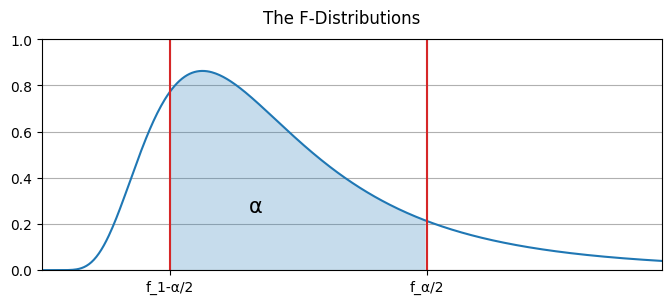

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,3),sharey=True)

fig.suptitle("The F-Distributions")

xs = np.linspace(0,3,500)

v1, v2 = 30, 10
a = 0.3
f_a_2 = f_dist.ppf(1-a/2, v1, v2)
f_1m_a_2 = f_dist.ppf(a/2, v1, v2)
xs_bet = xs[(xs <= f_a_2) & (xs >= f_1m_a_2)]

ax.plot(xs, f_dist.pdf(xs, v1, v2))
ax.fill_between(xs_bet, xs_bet*0, f_dist.pdf(xs_bet, v1, v2), alpha=0.25)
ax.plot([f_a_2]*2   , [0,1], color="tab:red")
ax.plot([f_1m_a_2]*2, [0,1], color="tab:red")
ax.text(1, 0.25, "α", size=15)

ax.set(
    xlim=[0,3], ylim=[0,1],
    xticks=[f_1m_a_2, f_a_2], xticklabels=["f_1-α/2", "f_α/2"],
    axisbelow=True
)
ax.grid();

Substituting the $F$, we write

$$
P\left[ f_{1-\alpha/2}(v_1,v_2) < \frac{S^2_1 / \sigma^2_1}{S^2_2 / \sigma^2_2} < f_{\alpha/2}(v_1,v_2) \right] = 1-\alpha
$$

Multiplying each term in the inequality by $S^2_2/S^2_1$ and then inverting each term, we obtain

$$
P\left[ \frac{S^2_1}{S^2_2}\frac{1}{f_{\alpha/2}(v_1,v_2)} < \frac{\sigma^2_1}{\sigma^2_2} < \frac{S^2_1}{S^2_2}\frac{1}{f_{1-\alpha/2}(v_1,v_2)} \right] = 1-\alpha
$$

Using the fact that

$$
f_{1-\alpha}(v_1,v_2) = \frac{1}{f_{\alpha}(v_2,v_1)}
$$

we obtain the probability statement

$$
P\left[ \frac{S^2_1}{S^2_2}\frac{1}{f_{\alpha/2}(v_1,v_2)} < \frac{\sigma^2_1}{\sigma^2_2} < \frac{S^2_1}{S^2_2}f_{\alpha/2}(v_2,v_1) \right] = 1-\alpha
$$

So we can obtain the confidence intervals for ratio between two variances as states below.

> <div style="color: green;"><b>CI on $\sigma^2_1 / \sigma^2_2$</b></div>
> 
> If $s^2_1$ and $s^2_2$ are the variances of independent samples of sizes $n_1$ and $n_2$, respectively, from normal populations, then a $100(1-\alpha)\%$ confidence interval for $\sigma^2_1/\sigma^2_2$ is
> $$ \frac{s^2_1}{s^2_2}\frac{1}{f_{\alpha/2}(v_1,v_2)} < \frac{\sigma^2_1}{\sigma^2_2} < \frac{s^2_1}{s^2_2}f_{\alpha/2}(v_2,v_1) $$
> where $f_{\alpha/2}(v_1, v_2)$ is an $f$-critical value with $v_1 = n_1 - 1$ and $v_2 = n_2 - 1$ degrees of freedom, leaving an area of $\alpha/2$ to the right, and $f_{\alpha/2}(v_2, v_1)$ is a similar $f$-critical value with the order of degrees of freedom swapped.

As for the single sample case, an approximate $100(1-\alpha)\%$ confidence interval for a ratio between two standard deviations $\sigma_1/\sigma_2$ is obtained by taking the square root of each endpoint of the interval for $\sigma^2_1/\sigma^2_2$.

<span style="color: green;"><b><u>Example</u></b></span>
The following data represent the running times of films produced by two motion-picture companies. 

| Company | Time (minutes) |
|:-------:|:---------------|
| $1$ | $103, 94, 110, 87, 98$ |
| $2$ | $97, 82, 123, 92, 175, 88, 118$ |

Construct a $90\%$ confidence interval for the ratio of the variances of running time of company 1 to company 2.

Let $\sigma^2_1$ and $\sigma^2_2$ be the variances of motion-film running times of company 1 and company 2 respectively. From the given samples data, we estimate:

In [7]:
com1 = np.array([103, 94, 110, 87, 98])
com2 = np.array([97, 82, 123, 92, 175, 88, 118])

print("Sample 1: mean =", np.round(com1.mean(), 4), "; var=", np.round(com1.var(ddof=1), 4))
print("Sample 2: mean =", np.round(com2.mean(), 4), "; var=", np.round(com2.var(ddof=1), 4))

Sample 1: mean = 98.4 ; var= 76.3
Sample 2: mean = 110.7143 ; var= 1035.9048


Using $\alpha=0.1$, $v_1=4$, $v_2=6$, we can find $f_{0.05}(4,6)=4.53$ and $f_{0.05}(6,4)=6.16$. Therefore, the $90\%$ confidence interval is given by

$$
\frac{76.3}{1035.9048} \cdot \frac{1}{4.53} < \frac{\sigma^2_1}{\sigma^2_2} < \frac{76.3}{1035.9048} \cdot 6.16
$$

or simply $0.0162 < \sigma^2_1/\sigma^2_2 < 0.4537$. Since the interval doesn't include the value $1$, this result suggest that the two variances are unequal.

<div style="widht:100%; height:20px; background-color:lightsalmon;"></div>